# Imports

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [43]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

# Data exploration

In [44]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data cleaning

In [45]:
# Remove the id, name, ticket and cabin columns

df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [46]:
# Create dummy variables for the categorical columns

df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

In [47]:
# Number of missing values in each column of training data

missing_val_count_by_column = (df_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Age    177
dtype: int64


In [48]:
# Number of missing values in each column of test data

missing_val_count_by_column = (df_test.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Age     86
Fare     1
dtype: int64


In [49]:
# Fill the missing values with the mean of the column

df_train = df_train.fillna(df_train.mean())
df_test = df_test.fillna(df_test.mean())

# Data visualization

In [50]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


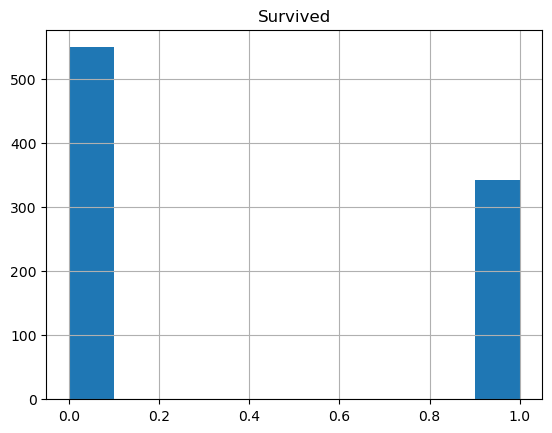

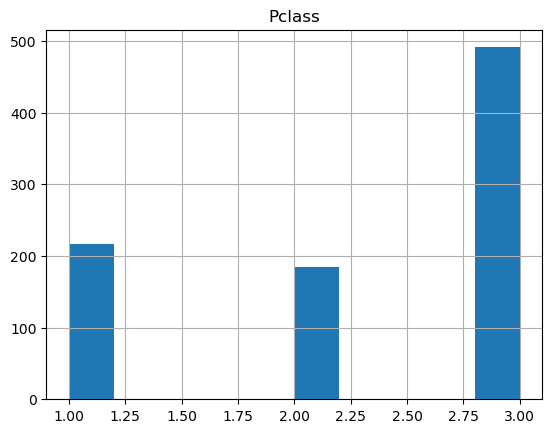

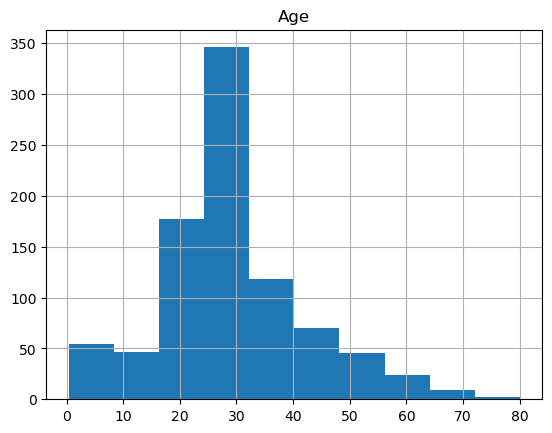

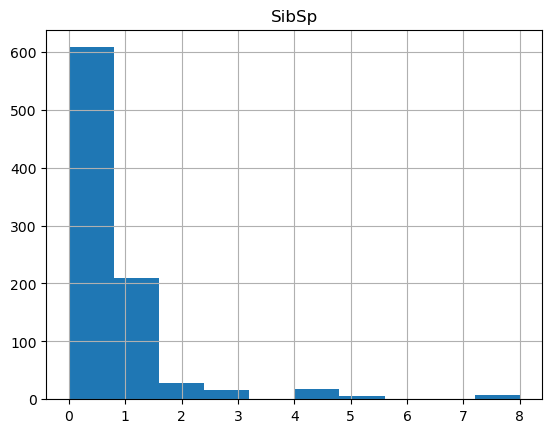

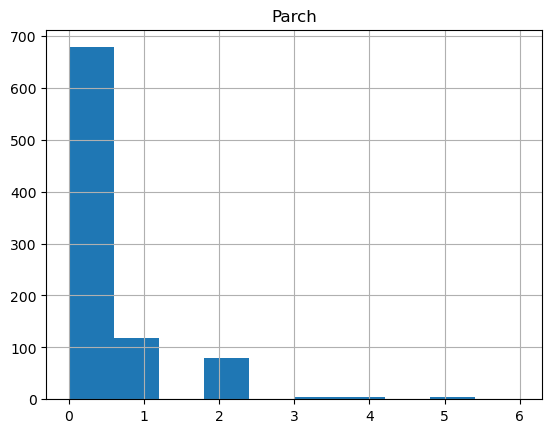

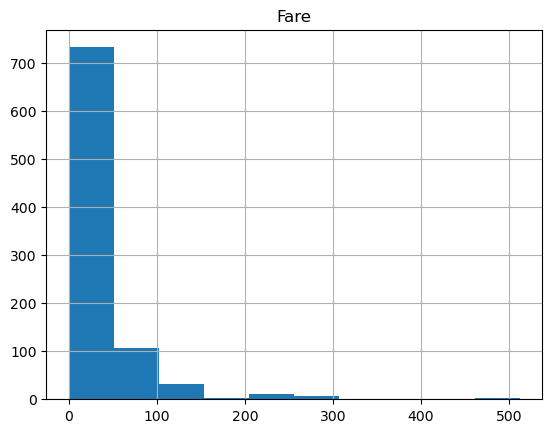

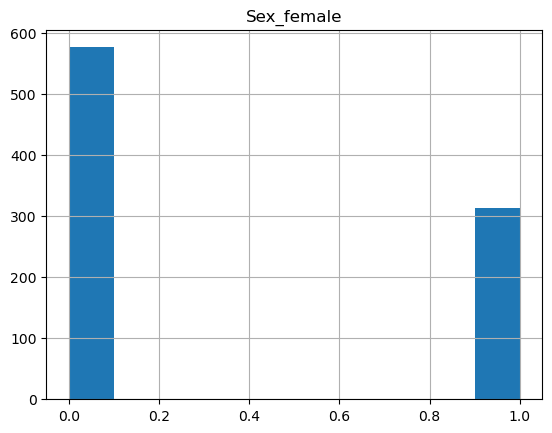

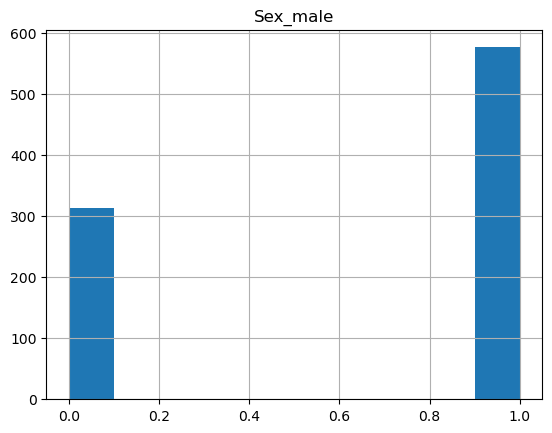

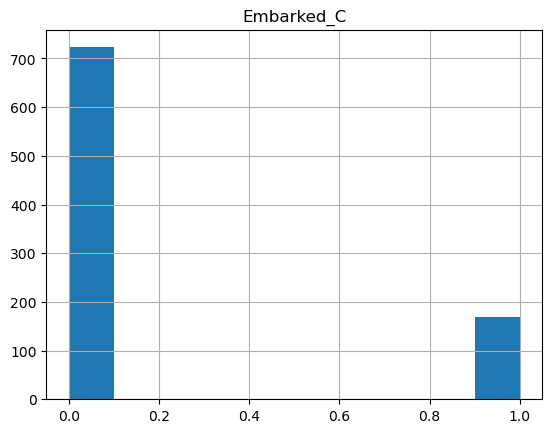

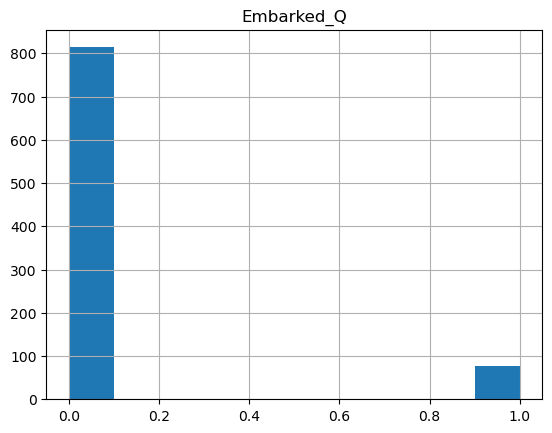

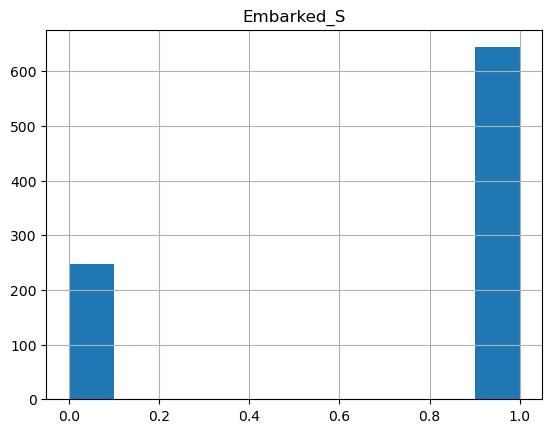

In [51]:
# Plot histograms of each column

for col in df_train.columns:
    df_train.hist(column=col)

<Axes: >

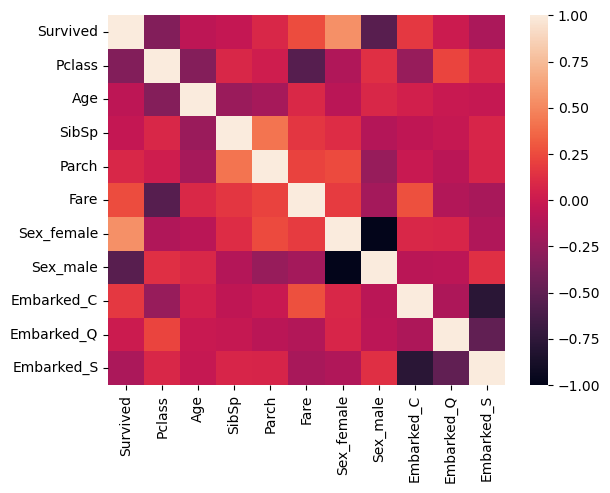

In [52]:
# Plot the correlation matrix

sns.heatmap(df_train.corr())

# Data modeling

In [53]:
# Split the data into training and validation sets

X = df_train.drop(['Survived'], axis=1)
Y = df_train['Survived']

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)

## Base model

In [54]:
# Create a baseline model

from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(solver='lbfgs', max_iter=1000)

In [55]:
# Train the model

logistic_regression.fit(X_train, Y_train)

logistic_regression.score(X_val, Y_val)

0.8324022346368715

## XGBoost

In [56]:
import xgboost as xgb

In [57]:
xgb_model = xgb.XGBClassifier(
    n_estimators=1000,
    max_depth=3,
    learning_rate=0.01,
    early_stopping_rounds=5,
)

In [58]:
# Train the model
xgb_model.fit(X_train, Y_train, eval_set=[(X_val, Y_val)])

[0]	validation_0-logloss:0.68766
[1]	validation_0-logloss:0.68227
[2]	validation_0-logloss:0.67698
[3]	validation_0-logloss:0.67179
[4]	validation_0-logloss:0.66670
[5]	validation_0-logloss:0.66170
[6]	validation_0-logloss:0.65679
[7]	validation_0-logloss:0.65196
[8]	validation_0-logloss:0.64723
[9]	validation_0-logloss:0.64257
[10]	validation_0-logloss:0.63800
[11]	validation_0-logloss:0.63367
[12]	validation_0-logloss:0.62925
[13]	validation_0-logloss:0.62491
[14]	validation_0-logloss:0.62080
[15]	validation_0-logloss:0.61661
[16]	validation_0-logloss:0.61245
[17]	validation_0-logloss:0.60840
[18]	validation_0-logloss:0.60456
[19]	validation_0-logloss:0.60064
[20]	validation_0-logloss:0.59675
[21]	validation_0-logloss:0.59310
[22]	validation_0-logloss:0.58937
[23]	validation_0-logloss:0.58567
[24]	validation_0-logloss:0.58206
[25]	validation_0-logloss:0.57865
[26]	validation_0-logloss:0.57515
[27]	validation_0-logloss:0.57168
[28]	validation_0-logloss:0.56830
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=5,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [59]:
# Test the model

xgb_model.score(X_val, Y_val)

0.8603351955307262

# Submission file

In [60]:
# Make predictions on the test set

predictions = xgb_model.predict(df_test)

In [62]:
# Save the predictions to a CSV file

output = pd.DataFrame({'PassengerId': pd.read_csv('data/test.csv').PassengerId, 'Survived': predictions})
pd.DataFrame.to_csv(output, 'data/predictions.csv', index=False)